In [1]:
#widen display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

In [3]:
rds_connection_string = "postgres:postgres@localhost:5432/NBA_DB"
engine = create_engine(f'postgresql://{rds_connection_string}')

salaries_csv = 'data/nba_salary_data_03_to_17.csv'
team_stats_csv = 'data/nba_team_stats_00_to_18.csv'

In [4]:
nba_salary_df = pd.read_csv(salaries_csv)

In [5]:
team_stats_df = pd.read_csv(team_stats_csv)

In [6]:
engine.table_names()
output: ['team_stats', 'team_salaries']
nba_salary_df.to_sql(name='team_salaries', con=engine, if_exists='append', index=False)

In [7]:
by_season_and_team_df = pd.read_sql('select t.season, t.team, t.wins, t.losses, sum(salary) as "total_salary" \
from team_salaries as ts \
INNER JOIN team_stats as t on ts.team = t.team and ts.season = t.season \
group by t.season, t.team, t.wins, t.losses \
order by sum(salary) desc', engine)

In [28]:
by_season_and_team_df.describe()

,wins,losses,total_salary
count,463.000000,463.000000,4.630000e+02
mean,40.580994,40.412527,1.851242e+08
std,12.456393,12.431649,7.227263e+07
min,7.000000,9.000000,6.312000e+06
25%,32.000000,31.000000,1.422484e+08
50%,41.000000,40.000000,1.851705e+08
75%,50.000000,49.000000,2.252266e+08
max,73.000000,72.000000,4.493562e+08


In [9]:
by_team_df = pd.read_sql('select t.team, sum(t.wins) as "wins", sum(t.losses) as "losses", sum(salary) as "total_salary" \
from team_salaries as ts \
INNER JOIN team_stats as t on ts.team = t.team and ts.season = t.season \
group by t.team \
order by sum(salary) desc', engine)

In [10]:
by_team_df

,team,wins,losses,total_salary
0,New York Knicks,22272,32652,3.920135e+09
1,San Antonio Spurs,38064,15636,3.347991e+09
2,Los Angeles Lakers,21615,20463,3.278260e+09
3,Memphis Grizzlies,32181,32691,3.252392e+09
4,Miami Heat,26541,19629,3.240040e+09
5,Washington Wizards,25488,34020,3.240020e+09
6,Toronto Raptors,28755,29763,3.234084e+09
7,Portland Trail Blazers,26952,25122,3.224099e+09
8,Sacramento Kings,22221,33837,3.052483e+09
9,Dallas Mavericks,26682,18354,2.960817e+09


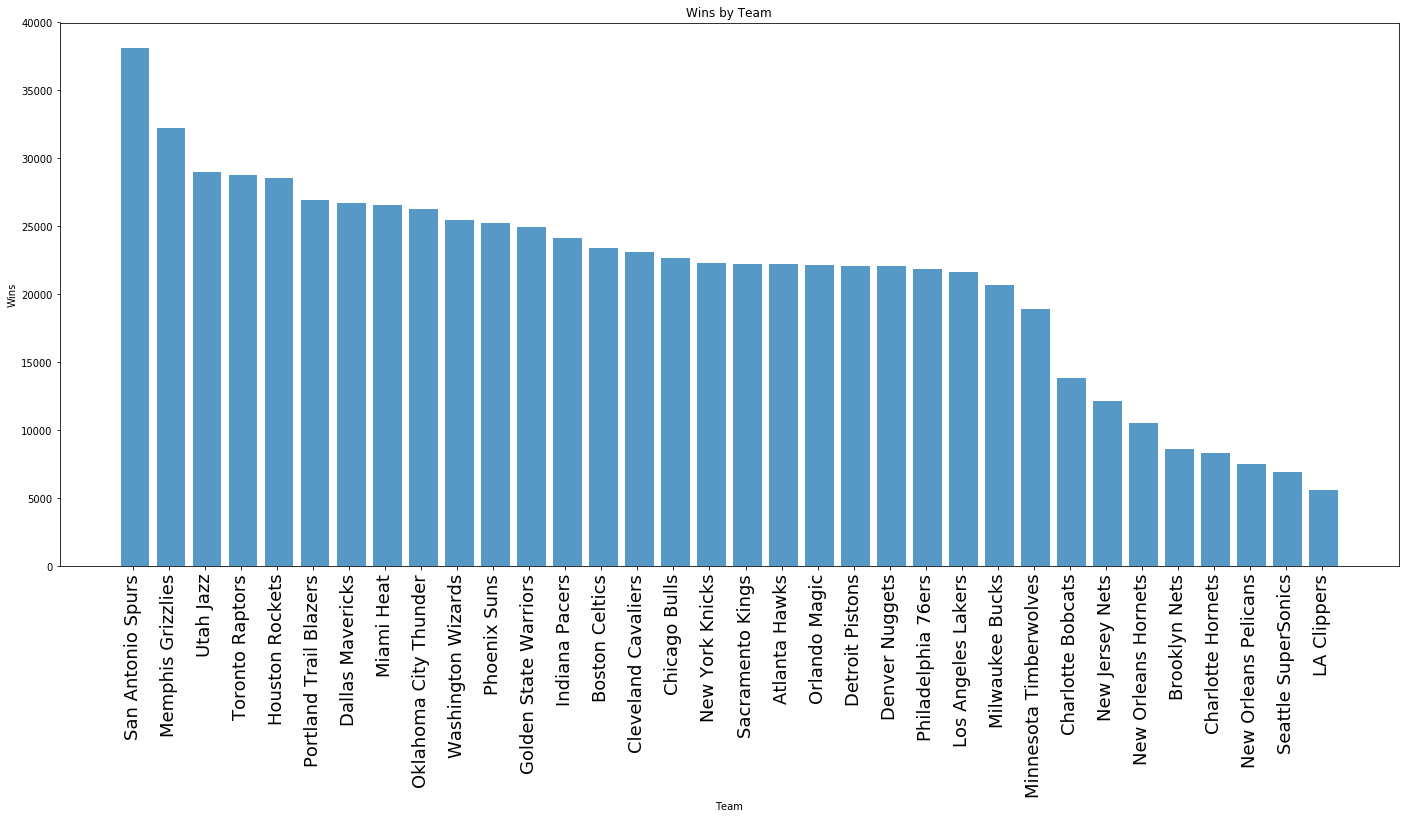

In [20]:
#Wins by Team
df_sorted_by_wins = by_team_df.sort_values('wins', ascending=False)

x_axis = np.arange(len(df_sorted_by_wins["team"]))
tick_locations = [value+0.35 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(24,10))
plt.bar(x_axis, df_sorted_by_wins["wins"], alpha=0.75, align="edge")
plt.xticks(tick_locations, df_sorted_by_wins["team"], rotation="vertical", fontsize="18")

# Set a Title and labels
plt.title("Wins by Team")
plt.xlabel("Team")
plt.ylabel("Wins")

# Save Figure
plt.savefig("wins_by_team_2003_to_2017.png")

plt.show()

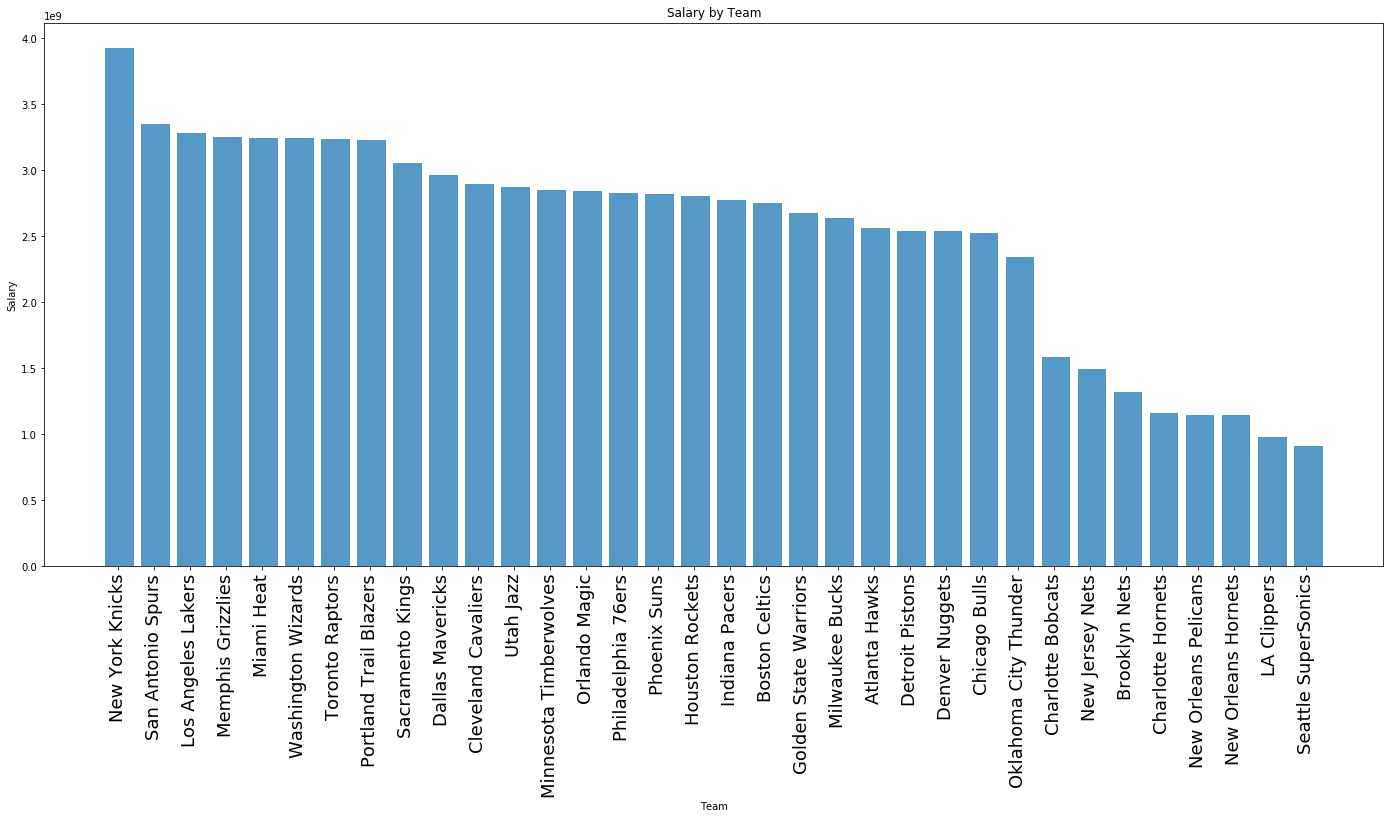

In [22]:
#Salary by Team
x_axis = np.arange(len(by_team_df["team"]))
tick_locations = [value+0.35 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(24,10))
plt.bar(x_axis, by_team_df["total_salary"], alpha=0.75, align="edge")
plt.xticks(tick_locations, by_team_df["team"], rotation="vertical", fontsize="18")

# Set a Title and labels
plt.title("Salary by Team")
plt.xlabel("Team")
plt.ylabel("Salary")

# Save Figure
plt.savefig("salary_by_team_2003_to_2017.png")

plt.show()

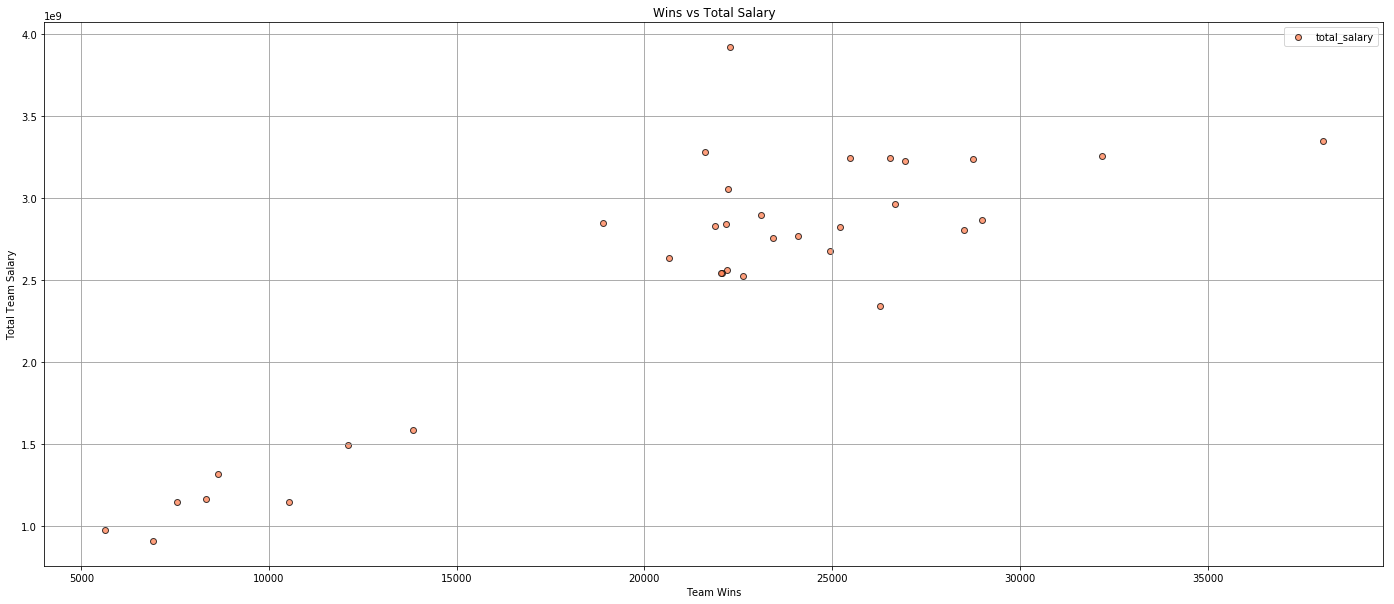

In [12]:
# Build the scatter plots to compare Wins vs Total Team Salary (between 2003-2017)
plt.figure(figsize=(24,10))
plot = plt.scatter(x=by_team_df['wins'], y=by_team_df['total_salary'], alpha=0.75, c='coral', edgecolors='black')

# Incorporate the other graph properties

plt.title('Wins vs Total Salary')
plt.xlabel('Team Wins')
plt.ylabel('Total Team Salary')
plt.grid(b=True, which='major', color='#999999', linestyle='-')

# Create a legend
lgnd = plt.legend(handles=[plot], loc="best", markerscale=1)


# Save Figure
plt.savefig("team_salary_vs_wins_2003_to_2017.png")

plt.show()

In [23]:
#Correlation between Wins and Total Team Salary (2003-2017)
by_team_df['wins'].corr(by_team_df['total_salary'])

0.8780922984656738